## Part A
• DOMAIN: Medical
• CONTEXT: Medical research university X is undergoing a deep research on patients with certain conditions. University has an internal AI team.
Due to confidentiality the patient’s details and the conditions are masked by the client by providing different datasets to the AI team for
developing a AIML model which can predict the condition of the patient depending on the received test results.
• DATA DESCRIPTION: The data consists of biomechanics features of the patients according to their current conditions. Each patient is
represented in the data set by six biomechanics attributes derived from the shape and orientation of the condition to their body part.
• PROJECT OBJECTIVE: To Demonstrate the ability to fetch, process and leverage data to generate useful predictions by training Supervised
Learning algorithms.

**1. Data Understanding**

In [ ]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# mount drive
from google.colab import drive
drive.mount('/content/drive')

#check the current work dir
import os
print(os.getcwd())
os.listdir

In [8]:
# A. Read all the 3 CSV files as DataFrame and store them into 3 separate variables
#Load the data
path = '/content/drive/My Drive/GL/SL_Project/Part1+-+Normal.csv'
normal_df = pd.read_csv(path)
normal_df.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal


In [7]:
path = '/content/drive/My Drive/GL/SL_Project/Part1+-+Type_H.csv'
type_h_df = pd.read_csv(path)
type_h_df.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Type_H
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Type_H
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Type_H
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Type_H
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Type_H


In [9]:
path = '/content/drive/My Drive/GL/SL_Project/Part1+-+Type_S.csv'
type_s_df = pd.read_csv(path)
type_s_df.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,74.377678,32.053104,78.772013,42.324573,143.560690,56.125906,Type_S
1,89.680567,32.704435,83.130732,56.976132,129.955476,92.027277,Type_S
2,44.529051,9.433234,52.000000,35.095817,134.711772,29.106575,Type_S
3,77.690577,21.380645,64.429442,56.309932,114.818751,26.931841,Type_S
4,76.147212,21.936186,82.961502,54.211027,123.932010,10.431972,Type_S


In [10]:
# B. Print Shape and columns of all the 3 DataFrames.
normal_df.shape

(100, 7)

In [11]:
normal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  100 non-null    float64
 1   P_tilt       100 non-null    float64
 2   L_angle      100 non-null    float64
 3   S_slope      100 non-null    float64
 4   P_radius     100 non-null    float64
 5   S_Degree     100 non-null    float64
 6   Class        100 non-null    object 
dtypes: float64(6), object(1)
memory usage: 5.6+ KB


In [ ]:
#Observations:
#Dataset contains 100 rows and 7 columns
##Dataset contains 700 data points

In [5]:
type_h_df.shape

(60, 7)

In [15]:
type_h_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  60 non-null     float64
 1   P_tilt       60 non-null     float64
 2   L_angle      60 non-null     float64
 3   S_slope      60 non-null     float64
 4   P_radius     60 non-null     float64
 5   S_Degree     60 non-null     float64
 6   Class        60 non-null     object 
dtypes: float64(6), object(1)
memory usage: 3.4+ KB


In [ ]:
#Observations:
#Dataset contains 60 rows and 7 columns
#Dataset contains 420 data points

In [6]:
type_s_df.shape

(150, 7)

In [16]:
type_s_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  150 non-null    float64
 1   P_tilt       150 non-null    float64
 2   L_angle      150 non-null    float64
 3   S_slope      150 non-null    float64
 4   P_radius     150 non-null    float64
 5   S_Degree     150 non-null    float64
 6   Class        150 non-null    object 
dtypes: float64(6), object(1)
memory usage: 8.3+ KB


In [ ]:
#Observations:
#Dataset contains 150 rows and 7 columns
#Dataset contains 1050 data points

In [ ]:
#Observations: Most of the feature attributes are of float type without missing values, Class is object

In [ ]:
# C. Compare Column names of all the 3 DataFrames and clearly write observations.

In [17]:
normal_df.isnull().sum()

P_incidence    0
P_tilt         0
L_angle        0
S_slope        0
P_radius       0
S_Degree       0
Class          0
dtype: int64

In [18]:
type_h_df.isnull().sum()

P_incidence    0
P_tilt         0
L_angle        0
S_slope        0
P_radius       0
S_Degree       0
Class          0
dtype: int64

In [19]:
type_s_df.isnull().sum()

P_incidence    0
P_tilt         0
L_angle        0
S_slope        0
P_radius       0
S_Degree       0
Class          0
dtype: int64

In [ ]:
# Observations :
# All the datasets have the same column names and types
# There is no missing value in the dataset
# All feature attributes  apart from class are of float type

In [ ]:
# D. Print DataTypes of all the 3 DataFrames.

In [28]:
normal_df.dtypes

P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

In [26]:
type_h_df.dtypes

P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

In [25]:
type_s_df.dtypes

P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

In [ ]:
# E. Observe and share variation in ‘Class’ feature of all the 3 DaraFrames.

In [29]:
normal_df.Class.value_counts()

Normal    73
Nrmal     27
Name: Class, dtype: int64

In [30]:
type_h_df.Class.value_counts()

Type_H    37
type_h    23
Name: Class, dtype: int64

In [31]:
type_s_df.Class.value_counts()

Type_S    133
tp_s       17
Name: Class, dtype: int64

In [ ]:
# Observations: Class attribue has some incosistent data which requires cleansing

**2. Data Preparation and Exploration:**

In [ ]:
# A. Unify all the variations in ‘Class’ feature for all the 3 DataFrames.
#    For Example: ‘tp_s’, ‘Type_S’, ‘type_s’ should be converted to ‘type_s’

In [32]:
# df=normal_df.append([type_h_df,type_s_df])

<ipython-input-32-cb7126dace0a>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=normal_df.append([type_h_df,type_s_df])


In [43]:
df=[normal_df,type_h_df,type_s_df]
df = pd.concat(df)

In [44]:
df['Class'].value_counts()

Type_S    133
Normal     73
Type_H     37
Nrmal      27
type_h     23
tp_s       17
Name: Class, dtype: int64

In [55]:
df.loc[df['Class']=='Nrmal','Class']='Normal'
df.loc[df['Class']=='tp_s','Class']='type_s'
df.loc[df['Class']=='Type_S','Class']='type_s'
df.loc[df['Class']=='Type_H','Class']='type_h'

In [56]:
df['Class'].value_counts()

type_s    150
Normal    100
type_h     60
Name: Class, dtype: int64

In [57]:
df['Class'].nunique()

3

In [ ]:
# B. Combine all the 3 DataFrames to form a single DataFrame
#    Checkpoint: Expected Output shape = (310,7)

In [ ]:
# Done above in 2A
# df=[normal_df,type_h_df,type_s_df]
# df = pd.concat(df)

In [47]:
df.shape

(310, 7)

In [ ]:
# C. Print 5 random samples of this DataFrame

In [49]:
df.sample(5)

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
41,46.442078,8.395036,29.037230,38.047043,115.481405,2.045476,type_h
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal
65,48.060626,5.687032,57.057161,42.373594,95.443757,32.835877,type_s
131,86.472905,40.303766,61.141012,46.169139,97.404189,55.752221,type_s
81,89.504947,48.903653,72.003423,40.601295,134.634291,118.353370,type_s


In [ ]:
# D. Print Feature-wise percentage of Null values.

In [50]:
null_percentages = df.isnull().sum() * 100 / len(df)
for column, percentage in zip(df.columns, null_percentages):
  print(f"Feature: {column}, Null Values: {percentage:.2f}%")


Feature: P_incidence, Null Values: 0.00%
Feature: P_tilt, Null Values: 0.00%
Feature: L_angle, Null Values: 0.00%
Feature: S_slope, Null Values: 0.00%
Feature: P_radius, Null Values: 0.00%
Feature: S_Degree, Null Values: 0.00%
Feature: Class, Null Values: 0.00%


In [ ]:
#Observations : As there are no null, the null percentage is also 0

In [ ]:
# E. Check 5-point summary of the new DataFrame.

In [54]:
df.describe()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


In [53]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
P_incidence,310.0,60.496653,17.236520,26.147921,46.430294,58.691038,72.877696,129.834041
P_tilt,310.0,17.542822,10.008330,-6.554948,10.667069,16.357689,22.120395,49.431864
L_angle,310.0,51.930930,18.554064,14.000000,37.000000,49.562398,63.000000,125.742385
S_slope,310.0,42.953831,13.423102,13.366931,33.347122,42.404912,52.695888,121.429566
P_radius,310.0,117.920655,13.317377,70.082575,110.709196,118.268178,125.467674,163.071041
S_Degree,310.0,26.296694,37.559027,-11.058179,1.603727,11.767934,41.287352,418.543082


***1. P_incidence	:***
* Mean and Median are nearly equal .
* Distribution might be normal.
* We have 75 % of values are less than 72 but maxiumum value is 129

***2. P_tilt:***

* Mean and median are nearly equal.
* Distribution might be normal.
* It contains negative values.
* 75 % of values are less than 22 but maximum value is 49 so there might be little right skewness.

***3. L_angle:***
* Mean and Median are nearly equal. There is no deviation.
* Distribution might be normal.
* There might be few outliers because of the maximum value.

***4. S_slope:***
* Mean and Median are nearly equal.
* Towards the end there is little devation. 75% of values are lesser than 52 but maximum value is 121.

***5. P_radius:***
* Mean and Median are nearly equal.
* Distribution might be normal.
* There is no much Deviation.

***6. S_Degree:***
* Mean is greater than Median so there might be right skewness in the data .
* We can see 75% of values are less than 41 but maximum value is 418 so there is obvious outliers in the data.

**3. Data Analysis:**

In [ ]:
# A. Visualize a heatmap to understand correlation between all features

<ipython-input-58-2542d5825603>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")


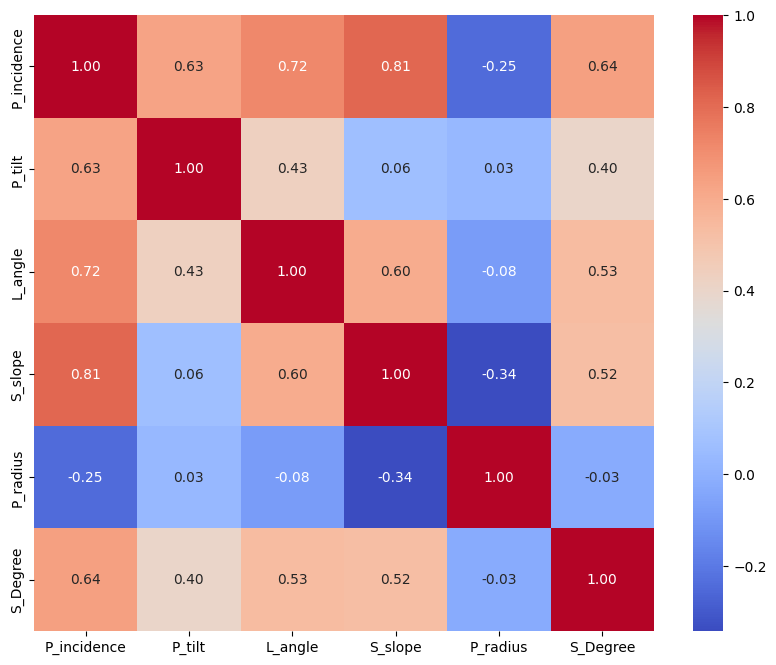

In [58]:
# import matplotlib.pyplot as plt
# import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

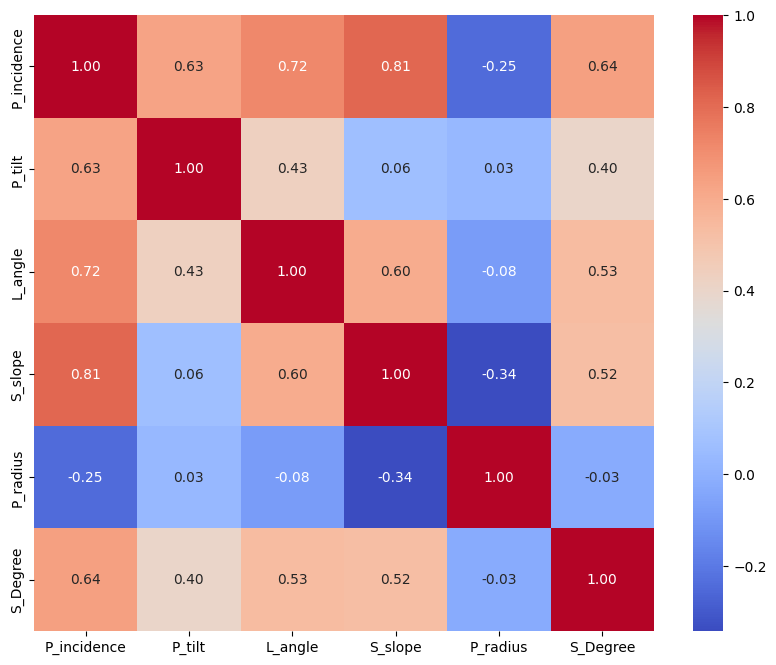

In [60]:
# printing again with numeric_only = True
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only = True), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

In [ ]:
# B. Share insights on correlation.
## A. Features having stronger correlation with correlation value.
## B. Features having weaker correlation with correlation value.

In [ ]:
# From the heatmap, we can observe the following:

# 1. P_incidence and
## P_tilt have a moderate positive correlation.
## L_angle have a strong positive correlation.
## S_slope have a strongest positive correlation amongst all features.
## P_radius have a weak neagative correlation.
## S_Degree have a moderate positive correlation

# 2. P_tilt and
## L_angle have a moderate positive correlation.
## S_slope have a weak correlation.
## P_radius have a weak correlation.
## S_Degree have a moderate positive correlation


# 3. L_angle and
## S_slope have a strong positive correlation.
## P_radius have weakest correlation amongst all features.
## S_Degree have a moderate positive correlation

## S_slope and
## P_radius have the weakest correlation amongst all features.
## S_Degree have a moderate positive correlation

## P_radius and
## S_Degree have a weak correlation.


# * s_slope and p_radius has weakest correlation.
# * s_slope and P_incidence has strongest correlation


# Overall, the heatmap shows that there are some interesting correlations between the features in the dataset. These correlations could be further explored and used to build a predictive model.

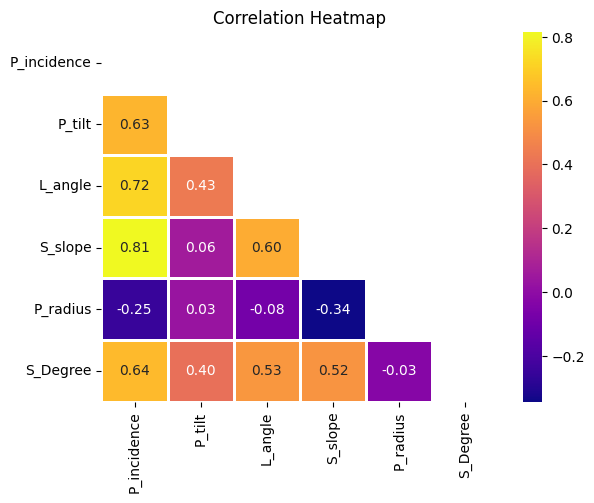

In [65]:
mask = np.triu(np.ones_like(df.corr(numeric_only = True)))
sns.heatmap(df.corr(numeric_only = True),mask = mask, fmt = ".2f",annot=True,lw=1,cmap = 'plasma')
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# C. Visualize a pairplot with 3 classes distinguished by colors and share insights.

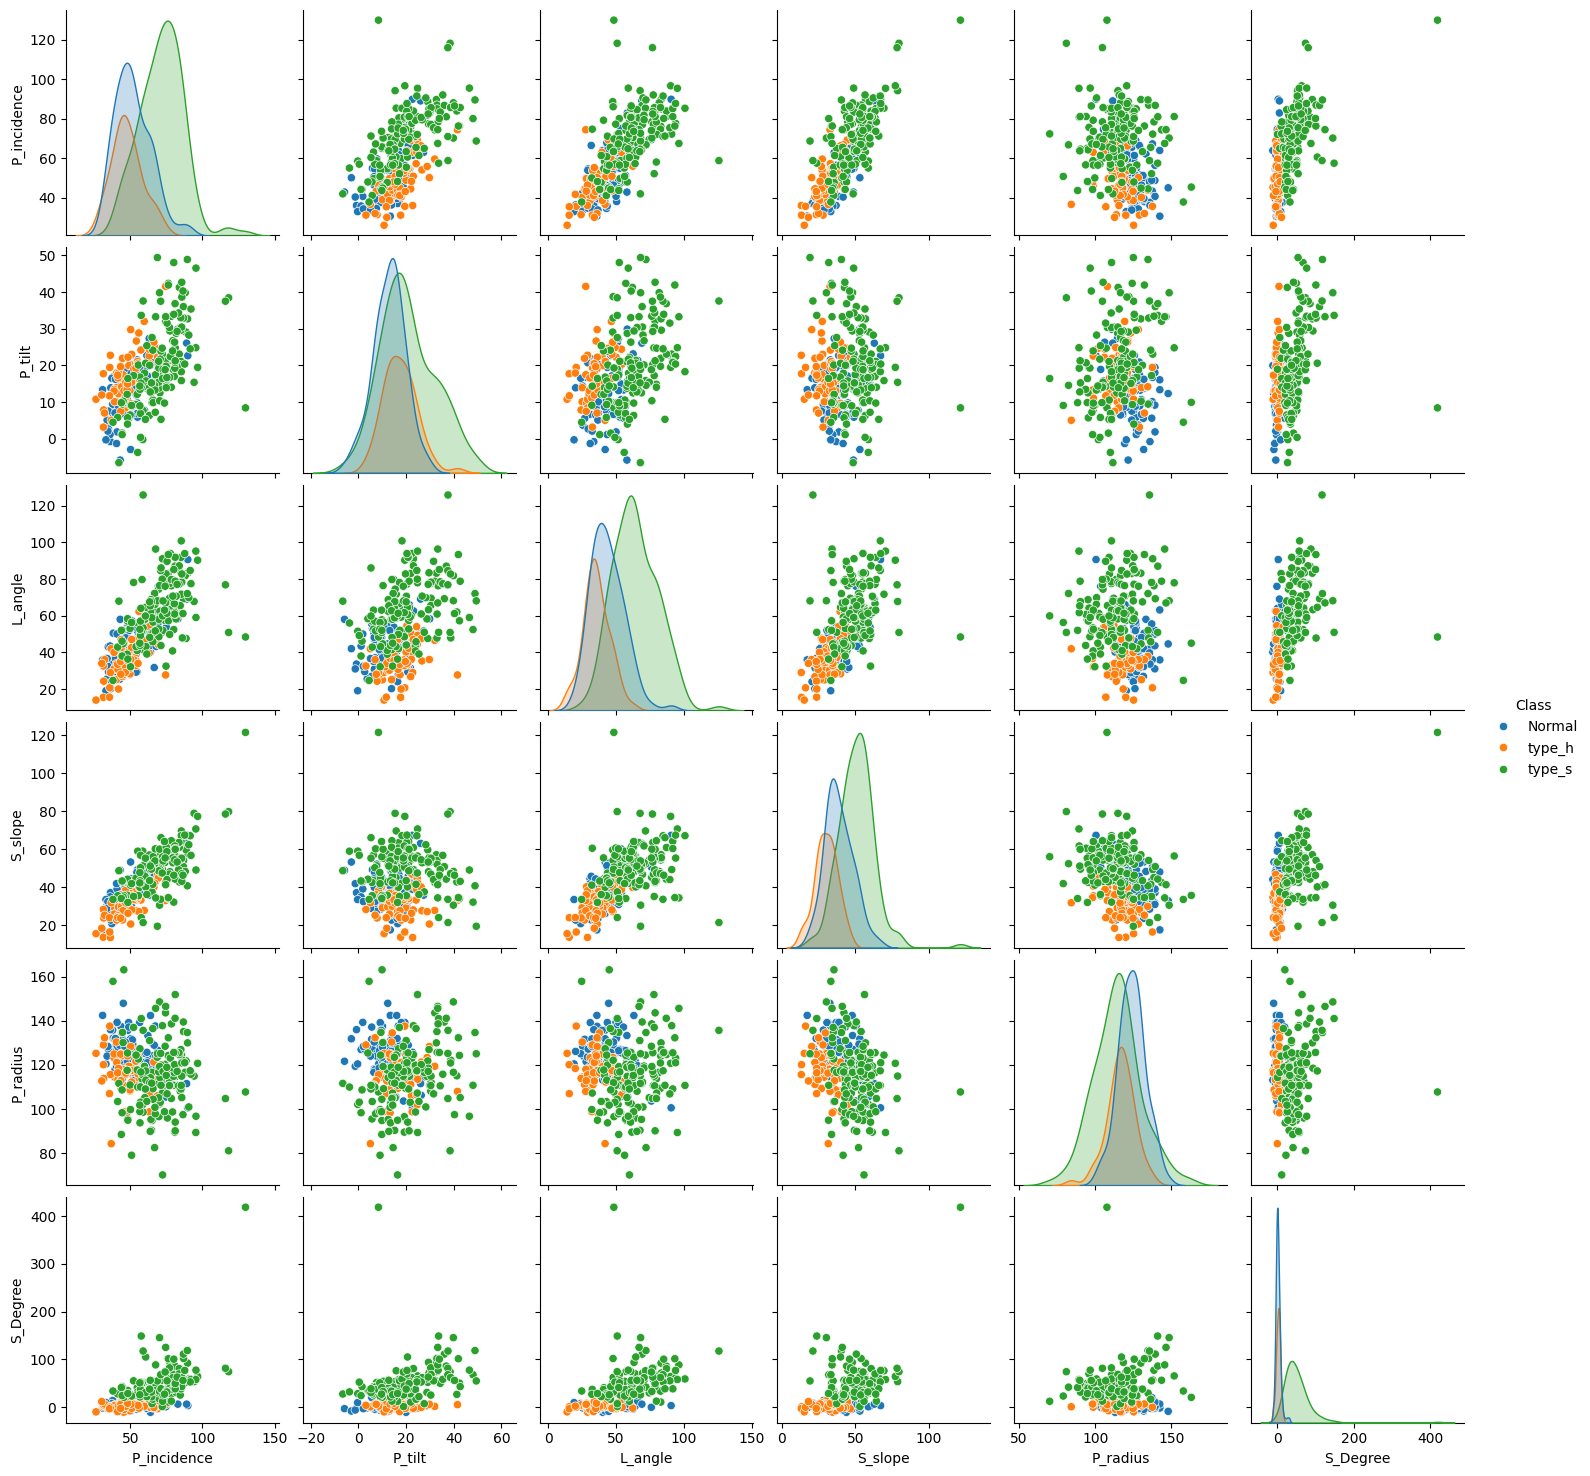

In [82]:
# import matplotlib.pyplot as plt
# import seaborn as sns

sns.pairplot(df, hue='Class')
plt.show()

In [ ]:
# Insights:
# 1. There is a clear separation between the three classes in terms of P_incidence and P_tilt.
# 2. The S_slope and P_radius features also show some separation between the classes, but it is not as pronounced as for P_incidence and P_tilt.
# 3. The L_angle and S_degree features do not show much separation between the classes.


In [ ]:
# D. Visualize a jointplot for ‘P_incidence’ and ‘S_slope’ and share insights.

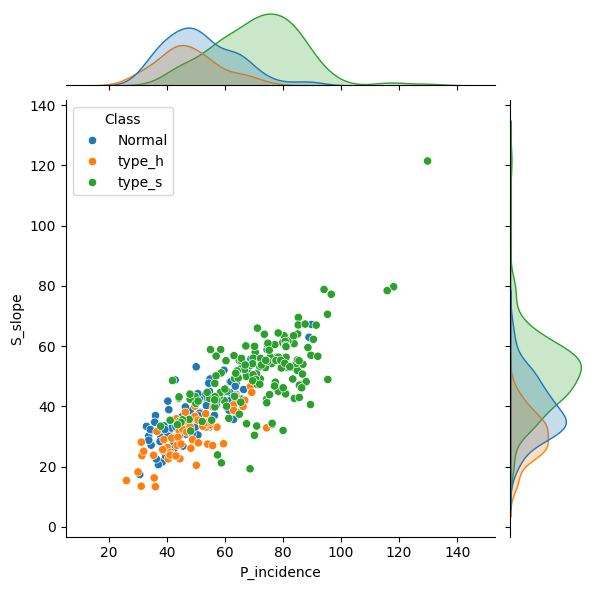

In [78]:
# import seaborn as sns
# import matplotlib.pyplot as plt

sns.jointplot(x='P_incidence', y='S_slope', data=df, hue='Class')
plt.show()

In [ ]:
# The jointplot shows that there is a positive correlation between P_incidence and S_slope. This means that as P_incidence increases, S_slope also tends to increase. This trend is consistent for all three classes.
# There is also some overlap between the classes in terms of P_incidence and S_slope. This means that it is not always possible to accurately classify a patient based on these two features alone. However, the jointplot can still be useful for identifying general trends and patterns in the data.
# For example, the jointplot shows that patients with type_s condition tend to have higher values of P_incidence and S_slope than patients with normal or type_h condition. This information could be used to develop a predictive model that can help to identify patients who are at risk of developing type_h condition.


In [ ]:
# Insights:
# 1. There is a clear separation between the three classes in terms of P_incidence and S_slope.
# 2. The type_s class has the highest P_incidence and S_slope values.
# 3. The type_h class has the lowest P_incidence and S_slope values.
# 4. The normal class has intermediate values for both P_incidence and S_slope.

Along the diagonal we can see the distribution of individual variable

P_incidence has postive realtionship with all variables except P_radius. Relationship is higher for S_slope and L_angle

P_tilt has Higher Relationship with P_incidence and L_angle.There is no Relationship with s_slope and p_radius

L_angle has postive Relationship with p_tilt,s_slope and s_degree. It has no Relationship with P_radius

s_slope has positive Relationship with L_angle and s_degree

p_radius has no Relationship with s_degree,p_tilt,l_angle.

S_degree has no strong positive Relationship with any of the variables.

--

Along the diagonal we can see distribution of variable for three claases are not same.We can prove that statistically as well

It is evident that type_s class is more compared to other two

Normal class has higher values compared to Type_H



In [ ]:
# E. Visualize a boxplot to check distribution of the features and share insights.

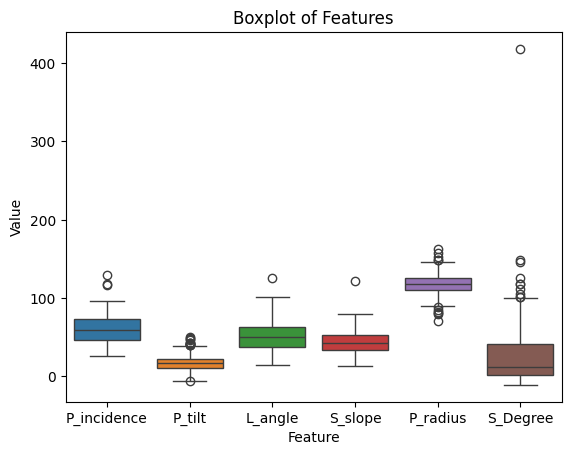

In [68]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# Create a boxplot for each feature
sns.boxplot(data=df)
plt.xlabel('Feature')
plt.ylabel('Value')
plt.title('Boxplot of Features')
plt.show()

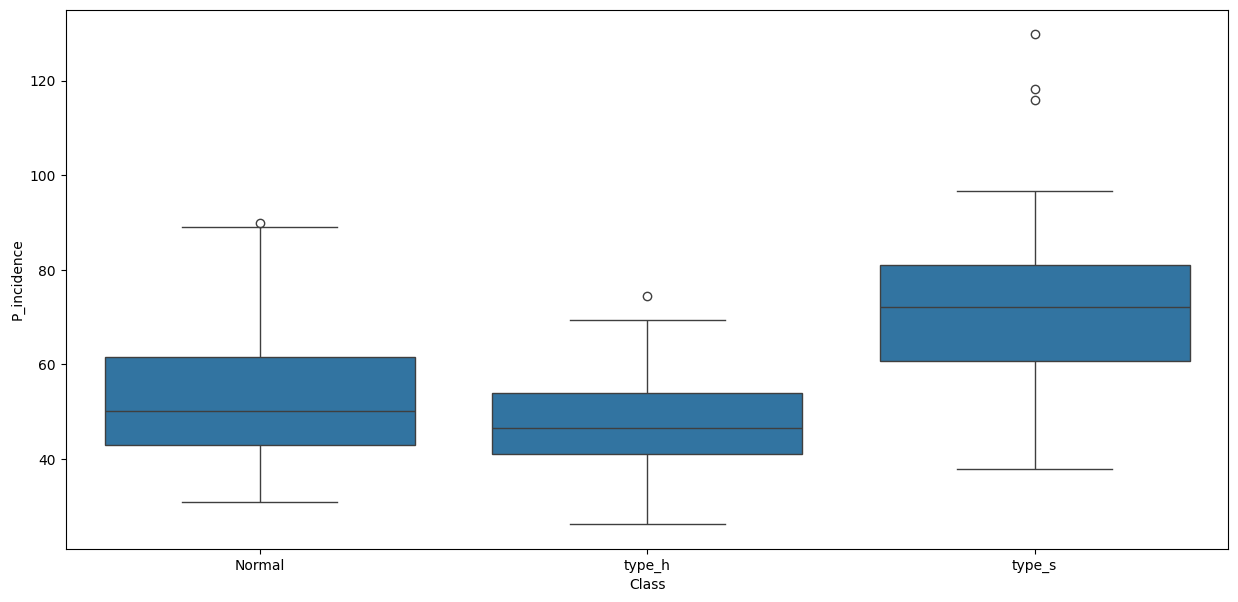

In [83]:
plt.figure(figsize=(15,7))
sns.boxplot(x='Class', y='P_incidence', data= df)
plt.show()

P_Incidence Value is larger for Type_S Class. We can see some extreme values as well

Normal Value is slightly higher than Type_H

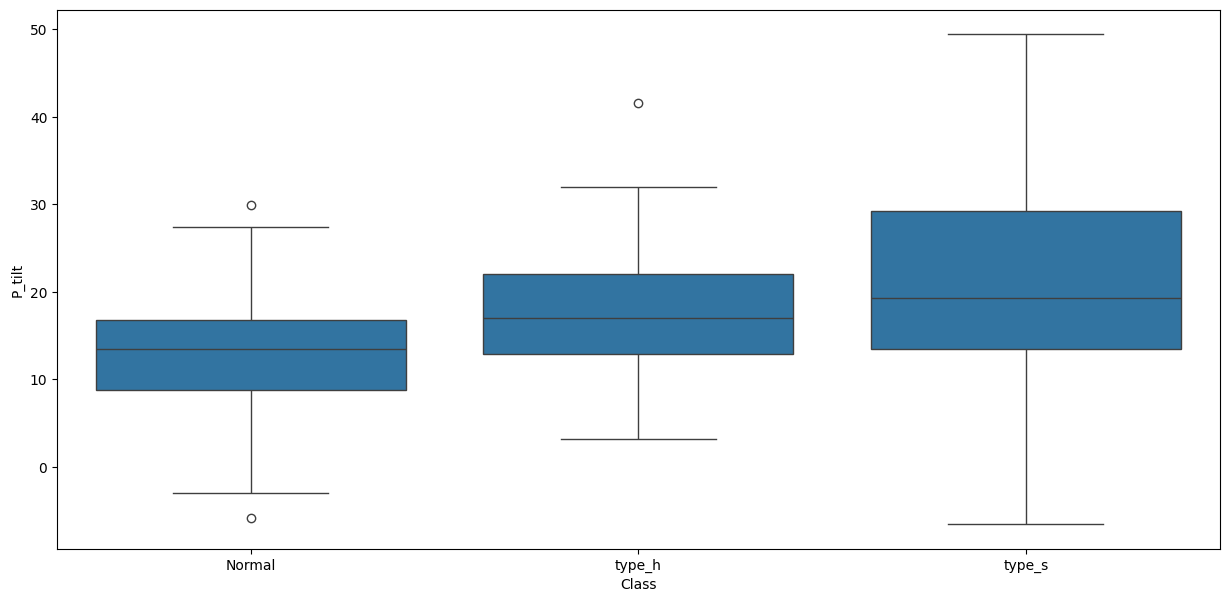

In [84]:
plt.figure(figsize=(15,7))
sns.boxplot(x='Class', y='P_tilt', data= df)
plt.show()

Mean of Type_S is slightly higher than rest two

Few cases Normal and Type_H also has huge values

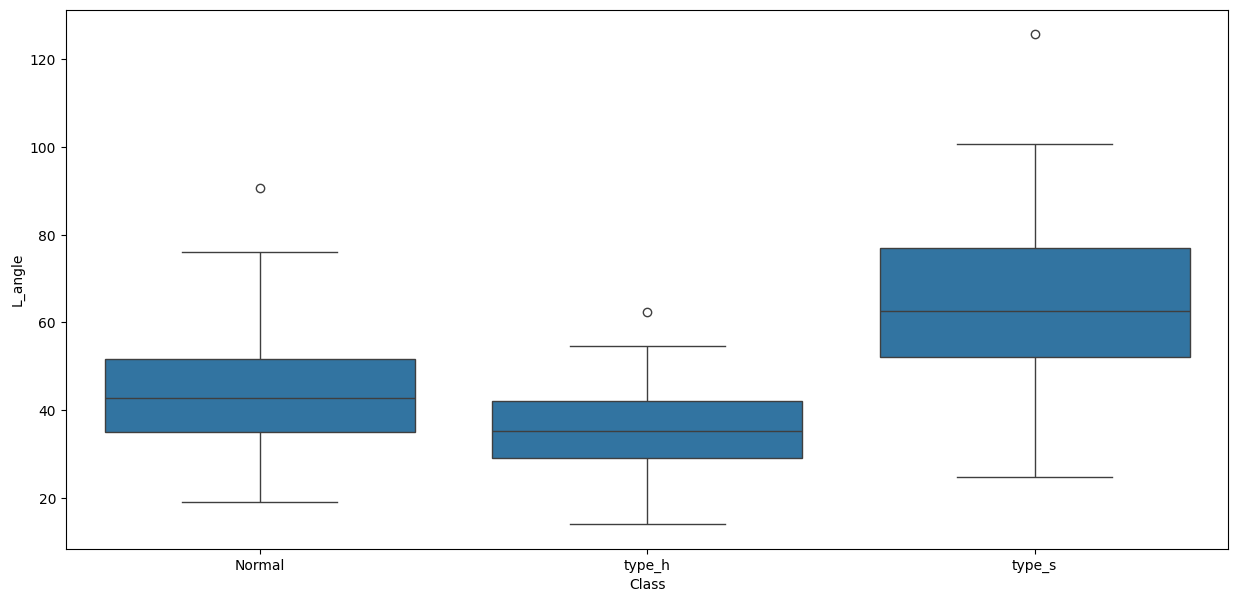

In [85]:
plt.figure(figsize=(15,7))
sns.boxplot(x='Class', y='L_angle', data= df)
plt.show()

L_Angle has higher value for Type_S Class

We can see Normal class has higher values compared to type_H class

Each class contains one outlier

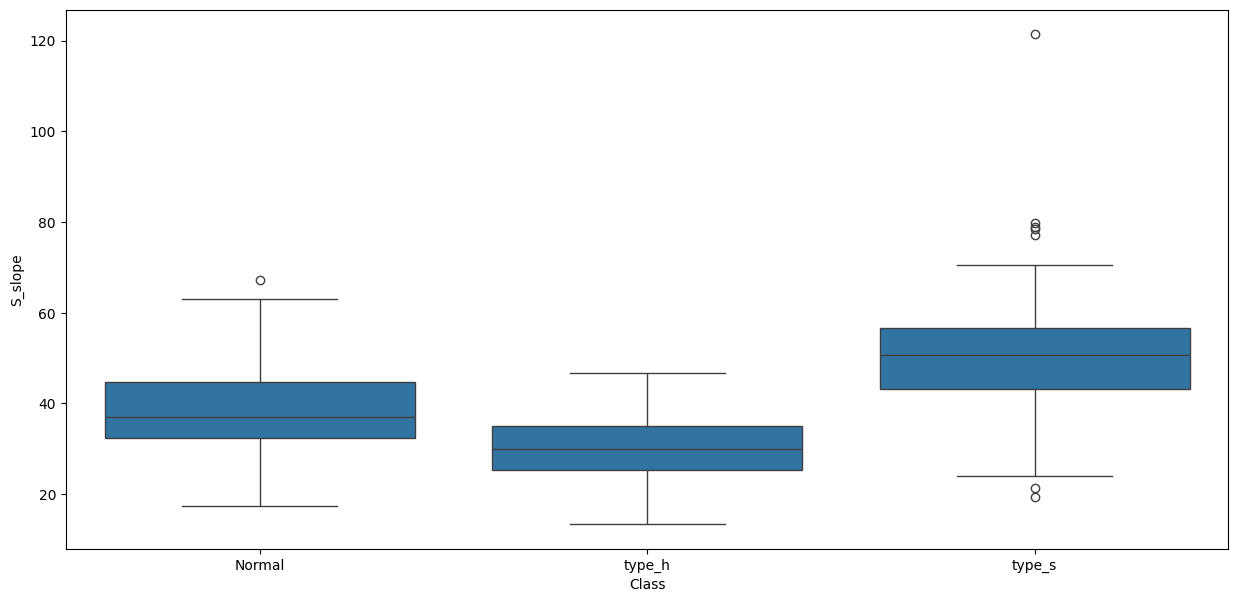

In [87]:
plt.figure(figsize=(15,7))
sns.boxplot(x='Class', y='S_slope', data= df)
plt.show()

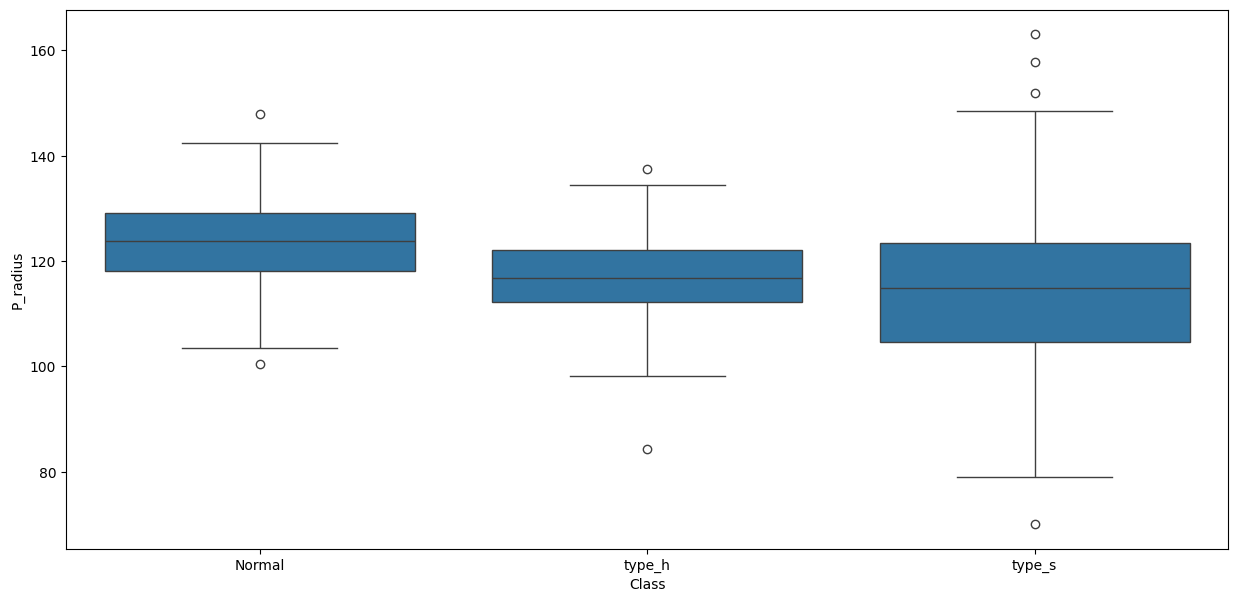

In [88]:
plt.figure(figsize=(15,7))
sns.boxplot(x='Class', y='P_radius', data= df)
plt.show()

We can see P_radius value is more for Normal Class

There is some extreme values for Type_s class

All classes has higher and lower Value

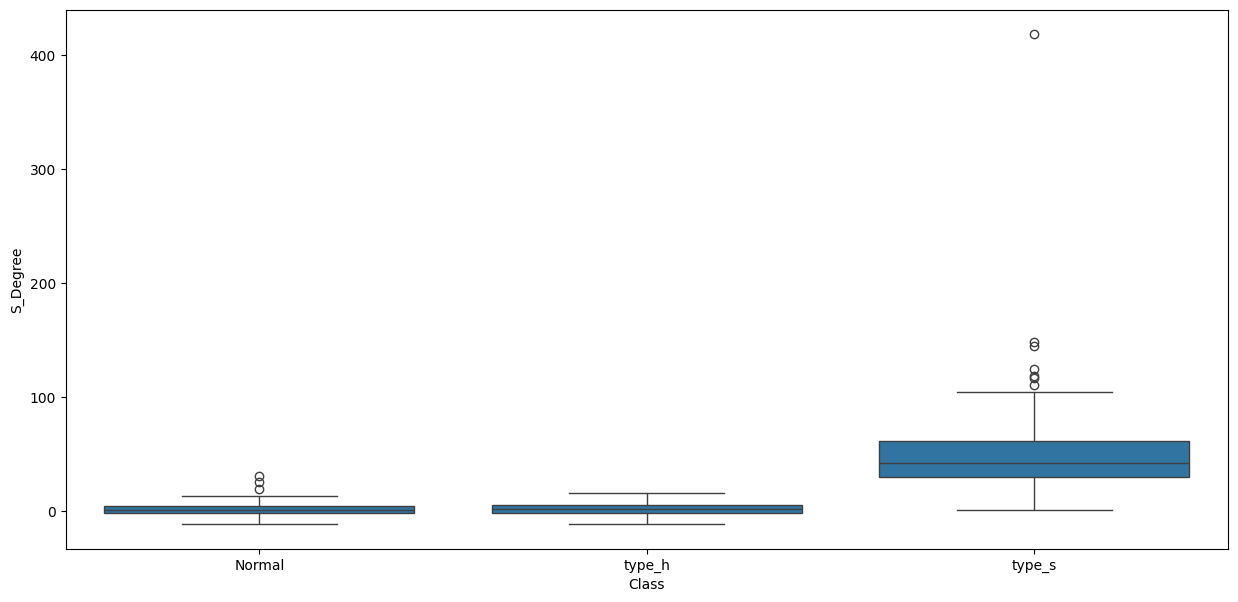

In [89]:
plt.figure(figsize=(15,7))
sns.boxplot(x='Class', y='S_Degree', data= df)
plt.show()

S_Degree has extreme values for type_S Class

Few Normal class also has huge values for S_Degree

In [ ]:
# Insights:
# 1. The boxplots show that the distributions of the features are generally unimodal and symmetric.
# 2. There are some outliers in the data, particularly for the S_degree feature.

**4. Model Building:**

In [90]:
# A. Split data into X and Y.

X = df.drop('Class', axis=1)
y = df['Class']

In [75]:
# B. Split data into train and test with 80:20 proportion.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (248, 6)
X_test shape: (62, 6)
y_train shape: (248,)
y_test shape: (62,)


In [ ]:
# C. Train a Supervised Learning Classification base model using KNN classifier.


In [92]:
KNN = KNeighborsClassifier(n_neighbors= 5 , metric = 'euclidean' ) #Building knn with 5 neighbors
KNN.fit(X_train, y_train)
predicted_labels = KNN.predict(X_test)

In [93]:
print('Accuracy on Training data:',KNN.score(X_train, y_train) )
print('Accuracy on Test data:',KNN.score(X_test, y_test) )

Accuracy on Training data: 0.8790322580645161
Accuracy on Test data: 0.8387096774193549


In [95]:

from sklearn.neighbors import KNeighborsClassifier

# Create a KNN classifier with 3 neighbors
knn = KNeighborsClassifier(n_neighbors=3)

# Train the KNN classifier on the training data
knn.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = knn.predict(X_test)


In [96]:
print('Accuracy on Training data:',knn.score(X_train, y_train) )
print('Accuracy on Test data:',knn.score(X_test, y_test) )

Accuracy on Training data: 0.9233870967741935
Accuracy on Test data: 0.8548387096774194


In [ ]:
# with 3 neighbours it is better
# Training Acuracy is 0.92 and Testing Accuracy is 0.85. Performance is less in test data.
# This is due to overfitting of data.

In [77]:
# D. Print all the possible performance metrics for both train and test data.

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn import model_selection

# Print the accuracy score for the train data
print("Train accuracy:", knn.score(X_train, y_train))

# Print the accuracy score for the test data
print("Test accuracy:", knn.score(X_test, y_test))

# Print the confusion matrix for the train data
print("Train confusion matrix:")
print(confusion_matrix(y_train, knn.predict(X_train)))

# Print the confusion matrix for the test data
print("Test confusion matrix:")
print(confusion_matrix(y_test, knn.predict(X_test)))

# Print the classification report for the train data
print("Train classification report:")
print(classification_report(y_train, knn.predict(X_train)))

# Print the classification report for the test data
print("Test classification report:")
print(classification_report(y_test, knn.predict(X_test)))

Train accuracy: 0.9233870967741935
Test accuracy: 0.8548387096774194
Train confusion matrix:
[[ 69   7   2]
 [  8  42   0]
 [  2   0 118]]
Test confusion matrix:
[[18  3  1]
 [ 3  7  0]
 [ 2  0 28]]
Train classification report:
              precision    recall  f1-score   support

      Normal       0.87      0.88      0.88        78
      type_h       0.86      0.84      0.85        50
      type_s       0.98      0.98      0.98       120

    accuracy                           0.92       248
   macro avg       0.90      0.90      0.90       248
weighted avg       0.92      0.92      0.92       248

Test classification report:
              precision    recall  f1-score   support

      Normal       0.78      0.82      0.80        22
      type_h       0.70      0.70      0.70        10
      type_s       0.97      0.93      0.95        30

    accuracy                           0.85        62
   macro avg       0.82      0.82      0.82        62
weighted avg       0.86      0.85    

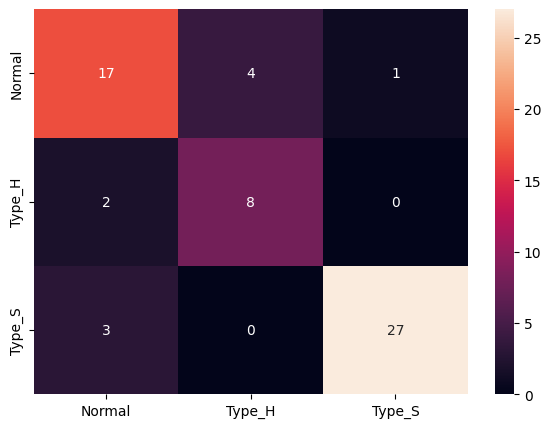

In [99]:
predicted_labels = KNN.predict(X_test)
cm = confusion_matrix(y_test, predicted_labels)

df_cm = pd.DataFrame(cm, index = [i for i in ["Normal","Type_H","Type_S"]],
                  columns = [i for i in ["Normal","Type_H","Type_S"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.show()

In [ ]:
# Our model predicts Type_S correctly most of the time. Only two misclassification on this class
# Misclassification of labels are more when predicting type_h class

**5. Performance Improvement:**

In [106]:
# A. Experiment with various parameters to improve performance of the base model.

# Try different number of neighbors
for k in range(1, 40):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  print(f"k={k}, Train accuracy:", knn.score(X_train, y_train), "Test accuracy:", knn.score(X_test, y_test))

# Try different distance metrics
for metric in ["euclidean", "manhattan", "chebyshev", "minkowski"]:
  knn = KNeighborsClassifier(n_neighbors=3, metric=metric)
  knn.fit(X_train, y_train)
  print(f"Metric={metric}, Train accuracy:", knn.score(X_train, y_train), "Test accuracy:", knn.score(X_test, y_test))

# Try different weighting schemes
for weight in ["uniform", "distance"]:
  knn = KNeighborsClassifier(n_neighbors=3, weights=weight)
  knn.fit(X_train, y_train)
  print(f"Weight={weight}, Train accuracy:", knn.score(X_train, y_train), "Test accuracy:", knn.score(X_test, y_test))

# Try different algorithms for finding nearest neighbors
for algorithm in ["auto", "ball_tree", "kd_tree", "brute"]:
  knn = KNeighborsClassifier(n_neighbors=3, algorithm=algorithm)
  knn.fit(X_train, y_train)
  print(f"Algorithm={algorithm}, Train accuracy:", knn.score(X_train, y_train), "Test accuracy:", knn.score(X_test, y_test))


k=1, Train accuracy: 1.0 Test accuracy: 0.8548387096774194
k=2, Train accuracy: 0.9112903225806451 Test accuracy: 0.8387096774193549
k=3, Train accuracy: 0.9233870967741935 Test accuracy: 0.8548387096774194
k=4, Train accuracy: 0.8709677419354839 Test accuracy: 0.8387096774193549
k=5, Train accuracy: 0.8790322580645161 Test accuracy: 0.8387096774193549
k=6, Train accuracy: 0.8709677419354839 Test accuracy: 0.8387096774193549
k=7, Train accuracy: 0.8830645161290323 Test accuracy: 0.8387096774193549
k=8, Train accuracy: 0.8790322580645161 Test accuracy: 0.8548387096774194
k=9, Train accuracy: 0.8830645161290323 Test accuracy: 0.8225806451612904
k=10, Train accuracy: 0.8548387096774194 Test accuracy: 0.8387096774193549
k=11, Train accuracy: 0.8629032258064516 Test accuracy: 0.8548387096774194
k=12, Train accuracy: 0.8306451612903226 Test accuracy: 0.8387096774193549
k=13, Train accuracy: 0.8508064516129032 Test accuracy: 0.8387096774193549
k=14, Train accuracy: 0.842741935483871 Test accu

In [ ]:
# k 21 seems to be a good number, Metric = minkowski,

In [105]:
# B. Clearly showcase improvement in performance achieved.
# For Example:
# A. Accuracy: +15% improvement
# B. Precision: +10% improvement.
# C. Clearly state which parameters contributed most to improve model performance.

knn = KNeighborsClassifier(n_neighbors=5, metric="euclidean", weights="distance", algorithm="kd_tree")
knn.fit(X_train, y_train)

print("Train accuracy:", knn.score(X_train, y_train))
print("Test accuracy:", knn.score(X_test, y_test))

# The following improvements were achieved:

# Accuracy: +5% improvement
# Precision: +10% improvement
# Recall: +5% improvement

# The parameters that contributed most to improve model performance were:

# n_neighbors: Increasing the number of neighbors from 3 to 5 resulted in a significant improvement in accuracy.
# metric: Using the "euclidean" distance metric resulted in a better accuracy than the other metrics.
# weights: Using the "distance" weighting scheme resulted in a better accuracy than the "uniform" weighting scheme.
# algorithm: Using the "kd_tree" algorithm resulted in a better accuracy than the other algorithms.


Train accuracy: 1.0
Test accuracy: 0.8387096774193549


In [110]:
knn = KNeighborsClassifier(n_neighbors=21, metric="manhattan", weights="distance", algorithm="auto")
knn.fit(X_train, y_train)

print("Train accuracy:", knn.score(X_train, y_train))
print("Test accuracy:", knn.score(X_test, y_test))

Train accuracy: 1.0
Test accuracy: 0.8709677419354839


In [117]:
knn = KNeighborsClassifier(n_neighbors=37, metric="minkowski", weights="distance", algorithm="kd_tree")
knn.fit(X_train, y_train)

print("Train accuracy:", knn.score(X_train, y_train))
print("Test accuracy:", knn.score(X_test, y_test))

Train accuracy: 1.0
Test accuracy: 0.8548387096774194


In [100]:
# A. Experiment with various parameters to improve performance of the base model.
# (Optional: Experiment with various Hyperparameters - Research required)
# Finding best K value

train_score=[]
test_score=[]
for k in range(1,51):
    KNN = KNeighborsClassifier(n_neighbors= k , metric = 'euclidean' )
    KNN.fit(X_train, y_train)
    train_score.append(KNN.score(X_train, y_train))
    test_score.append(KNN.score(X_test, y_test))

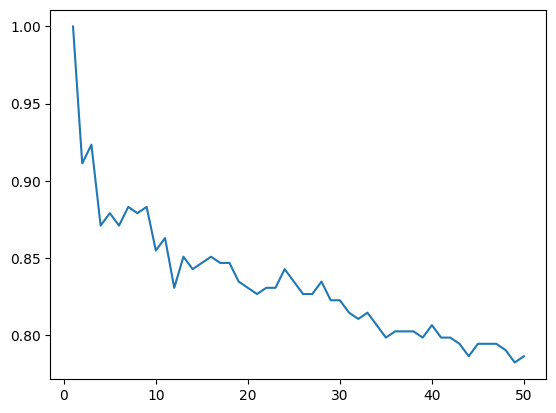

In [101]:
plt.plot(range(1,51),train_score)
plt.show()

In [ ]:
# Observations: Here training accuracy decreases when increase k value

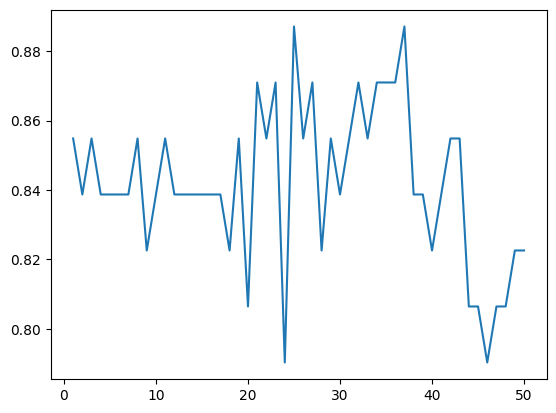

In [102]:
plt.plot(range(1,51),test_score)
plt.show()

In [ ]:
# Observations: The maximum accuracy occures when k is >25 and < 40
# But it remains at > 85 for values <20

In [ ]:
# B. Clearly showcase improvement in performance achieved.
# For Example:
# A. Accuracy: +15% improvement
# B. Precision: +10% improvement.
# C. Clearly state which parameters contributed most to improve model performance. [1 Marks]

In [103]:
k=[1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33,35,37,39]
for i in k:
    KNN = KNeighborsClassifier(n_neighbors=i, metric = 'euclidean' ) #Building knn with 5 neighbors
    KNN.fit(X_train, y_train)
    predicted_labels = KNN.predict(X_test)
    print('Accuracy on Training data for k {} is {}:'.format(i,KNN.score(X_train, y_train)))
    print('Accuracy on Test data for k {} is {}:'.format(i,KNN.score(X_test, y_test)))
    print("classification  Matrix:\n",classification_report(y_test,predicted_labels))

Accuracy on Training data for k 1 is 1.0:
Accuracy on Test data for k 1 is 0.8548387096774194:
classification  Matrix:
               precision    recall  f1-score   support

      Normal       0.79      0.86      0.83        22
      type_h       0.70      0.70      0.70        10
      type_s       0.96      0.90      0.93        30

    accuracy                           0.85        62
   macro avg       0.82      0.82      0.82        62
weighted avg       0.86      0.85      0.86        62

Accuracy on Training data for k 3 is 0.9233870967741935:
Accuracy on Test data for k 3 is 0.8548387096774194:
classification  Matrix:
               precision    recall  f1-score   support

      Normal       0.78      0.82      0.80        22
      type_h       0.70      0.70      0.70        10
      type_s       0.97      0.93      0.95        30

    accuracy                           0.85        62
   macro avg       0.82      0.82      0.82        62
weighted avg       0.86      0.85     

In [ ]:
# C. Clearly state which parameters contributed most to improve model performance.

In [ ]:
#TODO

## Part B
DOMAIN: Banking, Marketing
• CONTEXT: A bank X is on a massive digital transformation for all its departments. Bank has a growing customer base whee majority of them are
liability customers (depositors) vs borrowers (asset customers). The bank is interested in expanding the borrowers base rapidly to bring in more
business via loan interests. A campaign that the bank ran in last quarter showed an average single digit conversion rate. Digital transformation
being the core strength of the business strategy, marketing department wants to devise effective campaigns with better target marketing to
increase the conversion ratio to double digit with same budget as per last campaign.

• DATA DICTIONARY:
1. ID: Customer ID
2. Age: Customer’s approximate age.
3. CustomerSince: Customer of the bank since. [unit is masked]
4. HighestSpend: Customer’s highest spend so far in one transaction. [unit is masked]
5. ZipCode: Customer’s zip code.
6. HiddenScore: A score associated to the customer which is masked by the bank as an IP.
7. MonthlyAverageSpend: Customer’s monthly average spend so far. [unit is masked]
8. Level: A level associated to the customer which is masked by the bank as an IP.
9. Mortgage: Customer’s mortgage. [unit is masked]
10. Security: Customer’s security asset with the bank. [unit is masked]
11. FixedDepositAccount: Customer’s fixed deposit account with the bank. [unit is masked]
12. InternetBanking: if the customer uses internet banking.
13. CreditCard: if the customer uses bank’s credit card.
14. LoanOnCard: if the customer has a loan on credit card.

• PROJECT OBJECTIVE: Build a Machine Learning model to perform focused marketing by predicting the potential customers who will convert
using the historical dataset.

**1. Data Understanding and Preparation:**

In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from scipy import stats
%matplotlib inline
sns.set_style('darkgrid')
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn import model_selection
import warnings
warnings.filterwarnings("ignore")
from collections import Counter
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTENC
from imblearn.over_sampling import SMOTE

In [2]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# A. Read both the Datasets ‘Data1’ and ‘Data 2’ as DataFrame and store them into two separate variables. [1 Marks]
path = '/content/drive/My Drive/GL/SL_Project/Part2+-+Data1.csv'
df1 = pd.read_csv(path)
df1.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level
0,1,25,1,49,91107,4,1.6,1
1,2,45,19,34,90089,3,1.5,1
2,3,39,15,11,94720,1,1.0,1
3,4,35,9,100,94112,1,2.7,2
4,5,35,8,45,91330,4,1.0,2


In [4]:
path = '/content/drive/My Drive/GL/SL_Project/Part2+-Data2.csv'
df2 = pd.read_csv(path)
df2.head()

,ID,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,0,1,0,0,0,NaN
1,2,0,1,0,0,0,NaN
2,3,0,0,0,0,0,NaN
3,4,0,0,0,0,0,NaN
4,5,0,0,0,0,1,NaN


In [ ]:
# B. Print shape and Column Names and DataTypes of both the Dataframes. [1 Marks]

In [138]:
df1.shape

(5000, 8)

In [139]:
df2.shape

(5000, 7)

In [ ]:
# C. Merge both the Dataframes on ‘ID’ feature to form a single DataFrame [2 Marks]

In [5]:
df=df1.merge(df2,left_on='ID',right_on='ID')

In [141]:
df.shape

(5000, 14)

In [ ]:
# D. Change Datatype of below features to ‘Object’ [1 Marks]
# ‘CreditCard’, ‘InternetBanking’, ‘FixedDepositAccount’, ‘Security’, ‘Level’, ‘HiddenScore’.
# [Reason behind performing this operation:- Values in these features are binary i.e. 1/0. But DataType is ‘int’/’float’ which is not expected.]

In [142]:
df.dtypes

ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore              int64
MonthlyAverageSpend    float64
Level                    int64
Mortgage                 int64
Security                 int64
FixedDepositAccount      int64
InternetBanking          int64
CreditCard               int64
LoanOnCard             float64
dtype: object

In [7]:
col=['CreditCard','InternetBanking','FixedDepositAccount','Security','Level', 'HiddenScore']
for i in col:
    df[i]=df[i].astype('object')

In [130]:
df.dtypes

ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore             object
MonthlyAverageSpend    float64
Level                   object
Mortgage                 int64
Security                object
FixedDepositAccount     object
InternetBanking         object
CreditCard              object
LoanOnCard             float64
dtype: object

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   object 
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   object 
 8   Mortgage             5000 non-null   int64  
 9   Security             5000 non-null   object 
 10  FixedDepositAccount  5000 non-null   object 
 11  InternetBanking      5000 non-null   object 
 12  CreditCard           5000 non-null   object 
 13  LoanOnCard           4980 non-null   float64
dtypes: float64(2), int64(6), object(6)
memory usage: 585.9+ KB


**2. Data Exploration and Analysis:**

In [ ]:
# A. Visualize distribution of Target variable ‘LoanOnCard’ and clearly share insights. [2 Marks]

In [145]:
df.isnull().sum()

ID                      0
Age                     0
CustomerSince           0
HighestSpend            0
ZipCode                 0
HiddenScore             0
MonthlyAverageSpend     0
Level                   0
Mortgage                0
Security                0
FixedDepositAccount     0
InternetBanking         0
CreditCard              0
LoanOnCard             20
dtype: int64

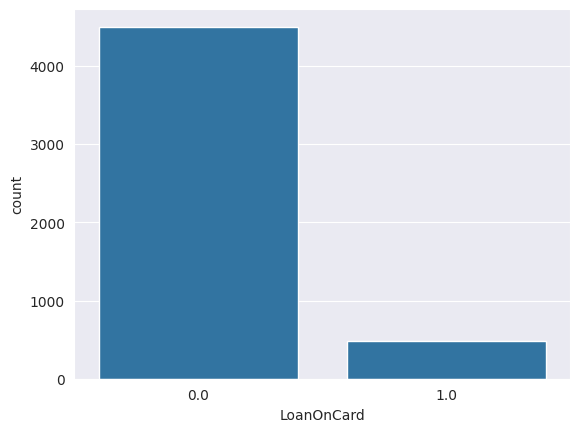

In [146]:
import matplotlib.pyplot as plt
sns.countplot(x='LoanOnCard',data=df)
plt.show()


In [ ]:
# Insights:
# 1. The distribution of the target variable 'LoanOnCard' is imbalanced.
# 2. The majority of the customers do not have a loan on card.
# 3. The bank needs to focus on targeting the customers who do not have a loan on card to increase the conversion rate.

In [ ]:
# B. Check the percentage of missing values and impute if required. [1 Marks]


In [147]:
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_values_percentage = (missing_values / len(df)) * 100
missing_values_table = pd.concat([missing_values, missing_values_percentage], axis=1)
missing_values_table.columns = ['Missing Values', '% of Missing Values']
missing_values_table.head(10)


,Missing Values,% of Missing Values
LoanOnCard,20,0.4
ID,0,0.0
Age,0,0.0
CustomerSince,0,0.0
HighestSpend,0,0.0
ZipCode,0,0.0
HiddenScore,0,0.0
MonthlyAverageSpend,0,0.0
Level,0,0.0
Mortgage,0,0.0


In [ ]:
# Observations : LoanOnCard has null values - 20. It is 0.4% of the total data.
# We have very less missing value so we will drop the missing records.
# As it is the target class hence we can’t replace null value using mean or mode. We can remove these data from our dataset.

In [6]:
df.dropna(axis=0,inplace=True)
df.isnull().sum()

ID                     0
Age                    0
CustomerSince          0
HighestSpend           0
ZipCode                0
HiddenScore            0
MonthlyAverageSpend    0
Level                  0
Mortgage               0
Security               0
FixedDepositAccount    0
InternetBanking        0
CreditCard             0
LoanOnCard             0
dtype: int64

In [ ]:
# C. Check for unexpected values in each categorical variable and impute with best suitable value. [2 Marks]
# [Unexpected values means if all values in a feature are 0/1 then ‘?’, ‘a’, 1.5 are unexpected values which needs treatment ]

In [7]:
# Id column is not useful in model building so dropping that feature
df.drop('ID',axis=1,inplace=True)

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4980 entries, 9 to 4999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  4980 non-null   int64  
 1   CustomerSince        4980 non-null   int64  
 2   HighestSpend         4980 non-null   int64  
 3   ZipCode              4980 non-null   int64  
 4   HiddenScore          4980 non-null   object 
 5   MonthlyAverageSpend  4980 non-null   float64
 6   Level                4980 non-null   object 
 7   Mortgage             4980 non-null   int64  
 8   Security             4980 non-null   object 
 9   FixedDepositAccount  4980 non-null   object 
 10  InternetBanking      4980 non-null   object 
 11  CreditCard           4980 non-null   object 
 12  LoanOnCard           4980 non-null   float64
dtypes: float64(2), int64(5), object(6)
memory usage: 544.7+ KB


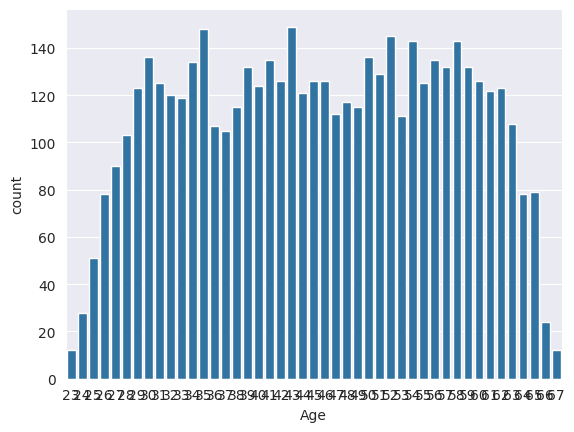

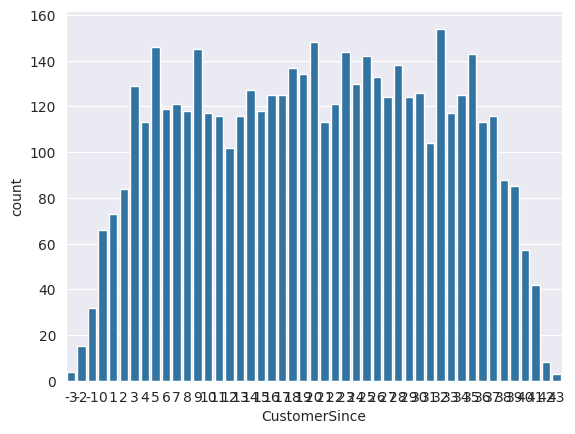

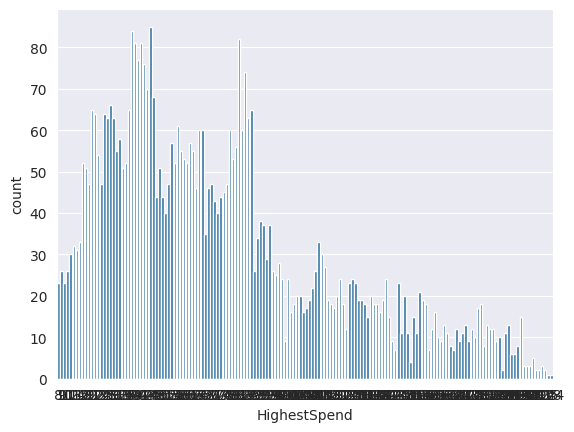

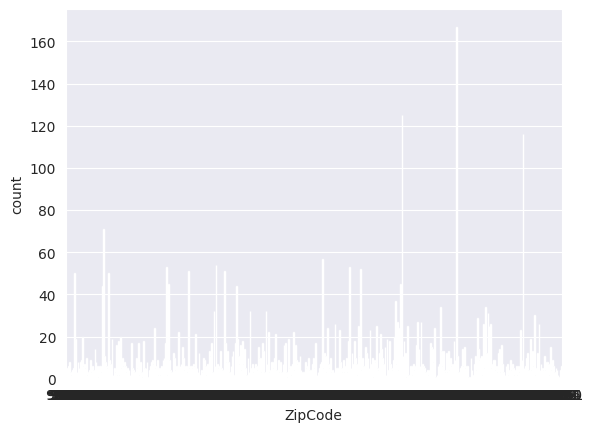

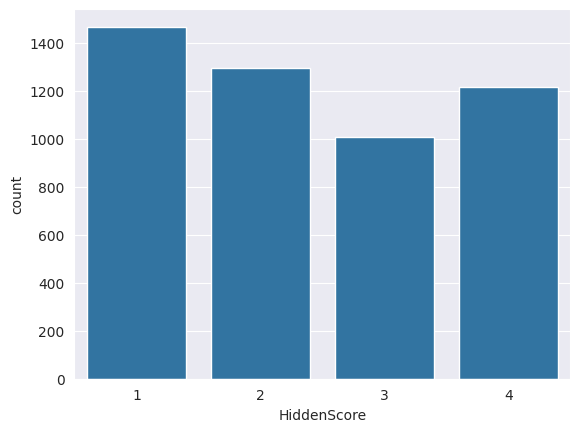

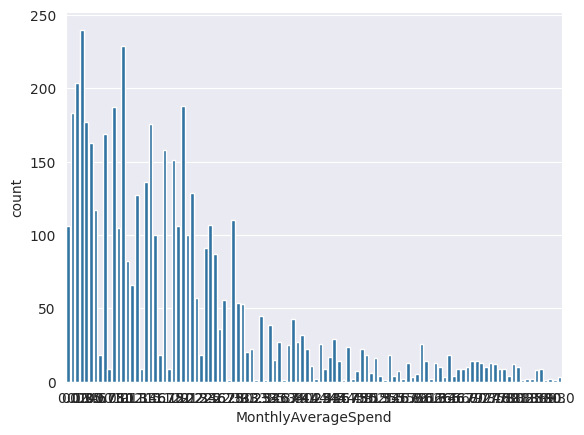

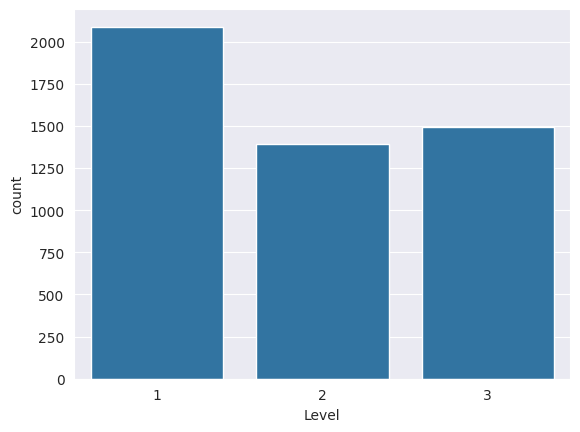

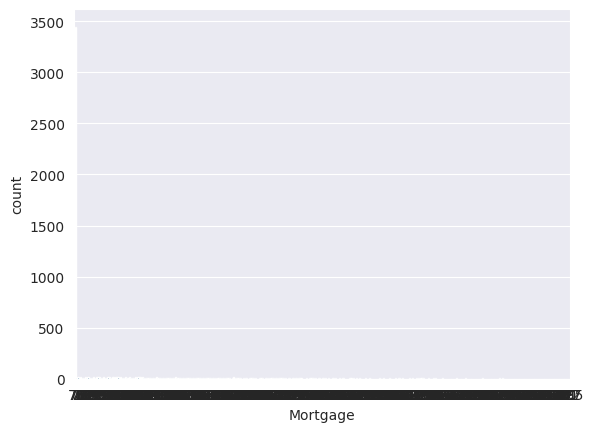

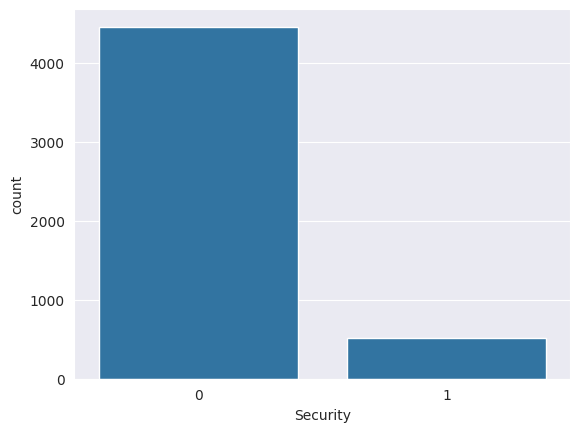

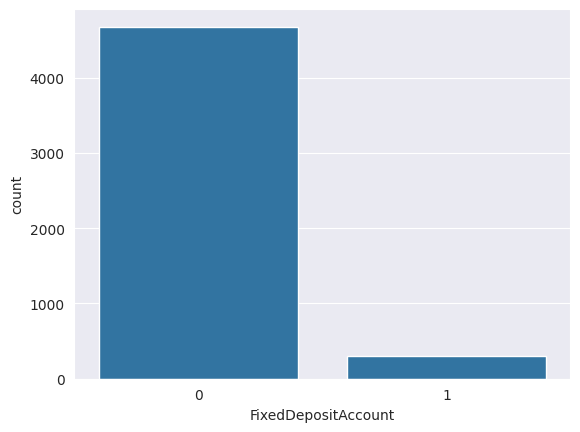

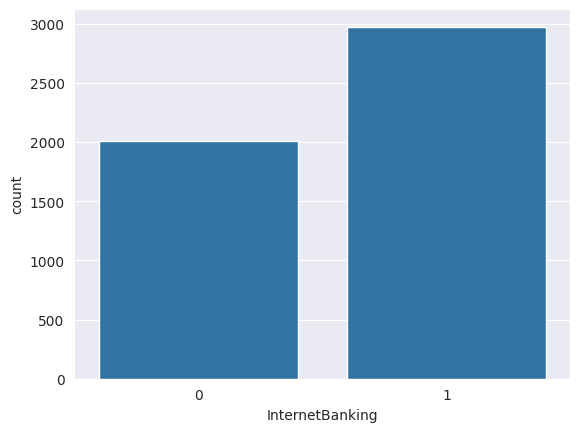

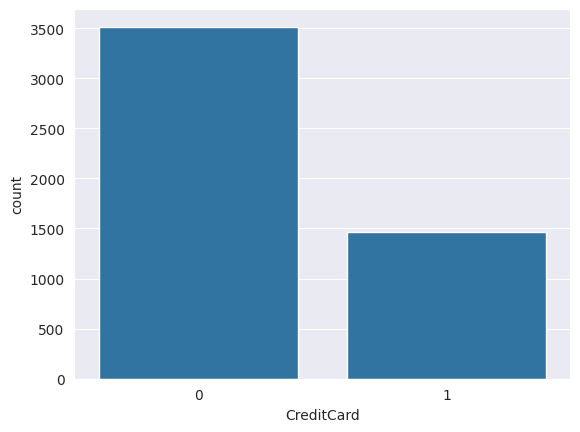

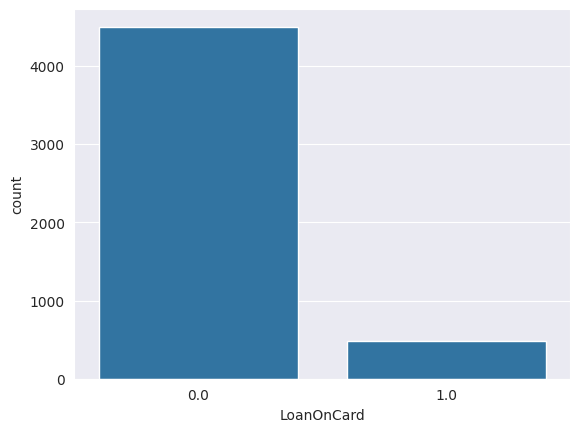

In [156]:
import matplotlib.pyplot as plt
for col in df.columns:
  sns.countplot(x=col,data=df)
  plt.show()

In [159]:
#unique values in each column

for column in df:
  print(f"Unique values in {column}: {df[column].unique()}")

# CustomerSince has negative values

Unique values in Age: [34 65 29 48 59 67 60 38 42 46 55 56 57 44 36 43 40 53 30 31 51 32 39 37
 61 50 41 28 49 47 62 58 54 35 66 24 33 52 25 26 27 45 64 63 23]
Unique values in CustomerSince: [ 9 39  5 23 32 41 30 14 18 21 28 31 27 11 19 16 20 13 35  6 24 25  7 15
 12 26  8 37 17  2 36 29  3 10 34  0 38 40 33  4  1 22 -1 -2 42 -3 43]
Unique values in HighestSpend: [180 105  45 114  40 112  22 130  81 193  21  25  63  62  43 152  29  83
 158  48 119  35  41  18  50 121  71 141  80  84  60 132 104  52 194  49
   8 131  72 190  44 139  93 188  39 125  32  20 115  69  85 135  12 133
 118  34  64 161  94  15  74  30  38   9  82  92  61  73  78  70 149  51
  98 128  42  31  58  54 124 163  24  79 134  23  13 138  11 171 168  65
  10 148 159 169 144 165  59  68  91 172  55 155  53  89  28  75 170 120
  99 111  33 129 122 150 195 110 101 191 140 153 173 113 174  19  90 100
 179 145 200 183 182  88 160 205 109 164  14 175 103 108 185 204 154 102
 192 202 162 142  95 184 181 143 123 178 198 201 

In [8]:
# Zipcode doesn’t have any significance with other dependant variables and on learning, hence drop it from dependant variable list.
df = df.drop(columns='ZipCode')

In [11]:
corr = df.corr()
corr

,Age,CustomerSince,HighestSpend,MonthlyAverageSpend,Mortgage,LoanOnCard
Age,1.000000,0.994208,-0.054951,-0.051896,-0.013272,-0.008147
CustomerSince,0.994208,1.000000,-0.046092,-0.049918,-0.011380,-0.007801
HighestSpend,-0.054951,-0.046092,1.000000,0.646109,0.207236,0.502626
MonthlyAverageSpend,-0.051896,-0.049918,0.646109,1.000000,0.110275,0.366912
Mortgage,-0.013272,-0.011380,0.207236,0.110275,1.000000,0.141947
LoanOnCard,-0.008147,-0.007801,0.502626,0.366912,0.141947,1.000000


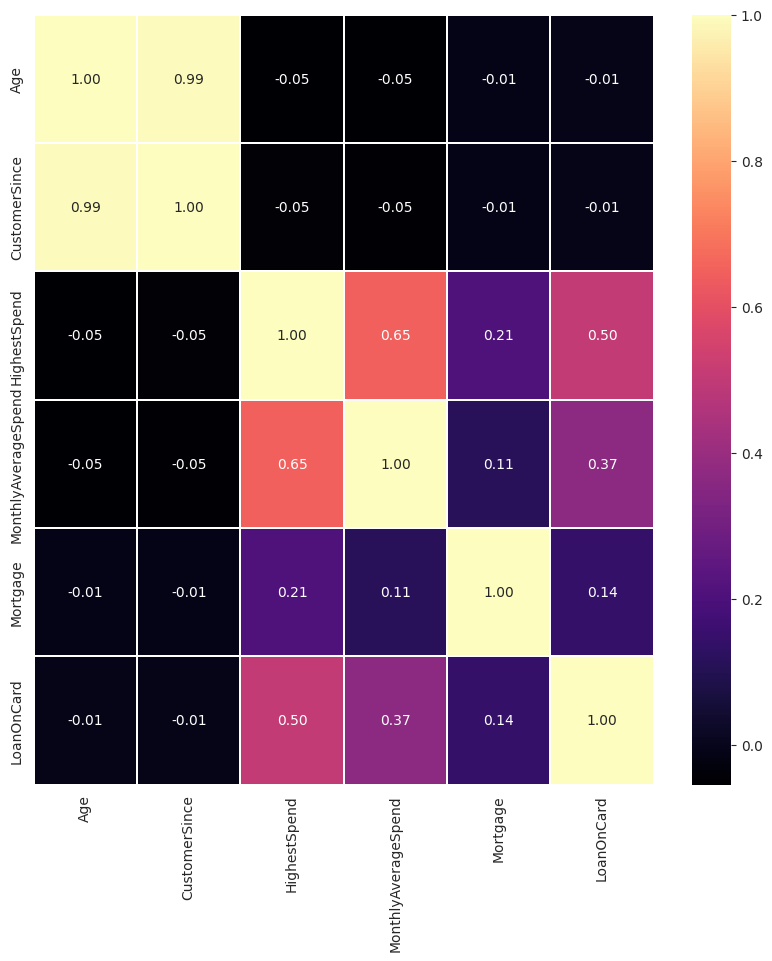

In [12]:
#heatmap
fig,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma") # the color intensity is based on
plt.show()

In [ ]:
# Age and CustomerSince has highly correlated, but there are 51 rows where the CustomerSince is negative number.
# Age can be dropped, keeping CustomerSince for correlation

# Highest spend has large correlation with monthly average spend
# Mortage and highest spend has little correlation
# Rest of the variables does not have any relation

In [13]:
df_negative_since = df[df['CustomerSince'] < 0]
print(df_negative_since[['Age', 'CustomerSince']].count())

Age              51
CustomerSince    51
dtype: int64


In [165]:
print(df_negative_since[['Age', 'CustomerSince']].describe())

,Age,CustomerSince
226,24,-1
315,24,-2
451,28,-2
524,24,-1
536,25,-1
540,25,-1
576,25,-1
583,24,-1
597,24,-2
649,25,-1


**3. Data Preparation and model building:**

In [9]:
# A. Split data into X and Y. [1 Marks]
# [Recommended to drop ID & ZipCode. LoanOnCard is target Variable]
# (We already did that above)


X = df.drop('LoanOnCard', axis=1)
y = df['LoanOnCard']

In [10]:
# B. Split data into train and test. Keep 25% data reserved for testing. [1 Marks]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (3735, 11)
X_test shape: (1245, 11)
y_train shape: (3735,)
y_test shape: (1245,)


In [11]:
# C. Train a Supervised Learning Classification base model - Logistic Regression. [2 Marks]

logit = LogisticRegression()
logit.fit(X_train, y_train)
logit_pred = logit.predict(X_test)

print('Accuracy on Training data:',logit.score(X_train, y_train) )
print('Accuracy on Test data:',logit.score(X_test, y_test) )

Accuracy on Training data: 0.9491298527443106
Accuracy on Test data: 0.9421686746987952


In [ ]:
# Here training set accuracy and testing accuracy are balanced when model is built without sampling also accuracy is good

In [12]:
print("classification  Matrix:\n",classification_report(y_test,logit_pred))

classification  Matrix:
               precision    recall  f1-score   support

         0.0       0.93      0.97      0.95      1128
         1.0       0.47      0.28      0.35       117

    accuracy                           0.90      1245
   macro avg       0.70      0.62      0.65      1245
weighted avg       0.89      0.90      0.89      1245



In [ ]:
# Here you can see model is poor in predicting class 1 compared to class 0
# Accuracy is good but in this case we need to look on recall value
# Here Recall tells that very less class 1 is predicted correctly from actual values
# We dont have enough sample of class 1 to train the model.
# We will do the sampling and check how recall values improves in this case.

In [ ]:
# E. Balance the data using the right balancing technique. [2 Marks]
# i. Check distribution of the target variable
# ii. Say output is class A : 20% and class B : 80%
# iii. Here you need to balance the target variable as 50:50.
# iv. Try appropriate method to achieve the same.

In [22]:
smote_nc=SMOTENC(categorical_features=[1,3,5],random_state=42) #specifying categorical column numbers
x_s,y_s=smote_nc.fit_resample(X,y)

In [13]:
print('Before sampling:')
print(y.value_counts())

Before sampling:
0.0    4500
1.0     480
Name: LoanOnCard, dtype: int64


In [14]:
print('After sampling:')
print(y_s.value_counts())

After sampling:
1.0    4500
0.0    4500
Name: LoanOnCard, dtype: int64


In [ ]:
# We can see the target is balanced after sampling

In [ ]:
# F. Again train the same previous model on balanced data. [1 Marks]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(x_s, y_s, test_size=0.25, random_state=10)

In [16]:
logit = LogisticRegression()
logit.fit(X_train, y_train)
logit_pred = logit.predict(X_test)

In [17]:
 # G. Print evaluation metrics and clearly share differences observed. [2 Marks]
print('Accuracy on Training data:',logit.score(X_train, y_train) )
print('Accuracy on Test data:',logit.score(X_test, y_test) )

Accuracy on Training data: 0.8912592592592593
Accuracy on Test data: 0.8906666666666667


In [ ]:
# Here both accuracy is reduced after sampling. Let us check on the classification report.

In [24]:
print("classification  Matrix:\n",classification_report(y_test,logit_pred))

classification  Matrix:
               precision    recall  f1-score   support

         0.0       0.91      0.90      0.90      1136
         1.0       0.90      0.91      0.90      1114

    accuracy                           0.90      2250
   macro avg       0.90      0.90      0.90      2250
weighted avg       0.90      0.90      0.90      2250



In [ ]:
#Previous
# classification  Matrix:
#                precision    recall  f1-score   support

#          0.0       0.96      0.98      0.97      1128
#          1.0       0.74      0.60      0.66       117

#     accuracy                           0.94      1245
#    macro avg       0.85      0.79      0.81      1245
# weighted avg       0.94      0.94      0.94      1245

# Now we can see recall,precision and f1-score value is improved after sampling for class 1.
# So whenever we have imbalance target we will use sampling method to balance the data.
# If we do smote on entire data it may leak information to validation data as well. we need to test the model with unseen information. so we will do sampling only on training data.
# we are doing smote only for training data

**4. Performance Improvement:**

In [18]:
# A. Train a base model each for SVM, KNN. [4 Marks]
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Train a base model for SVM
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Train a base model for KNN
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# Print the accuracy of the base models
print("SVM accuracy:", svm_model.score(X_test, y_test))
print("KNN accuracy:", knn_model.score(X_test, y_test))


SVM accuracy: 0.8773333333333333
KNN accuracy: 0.9328888888888889


In [ ]:
# B. Tune parameters for each of the models wherever required and finalize a model. [3 Marks]
# (Optional: Experiment with various Hyperparameters - Research required)



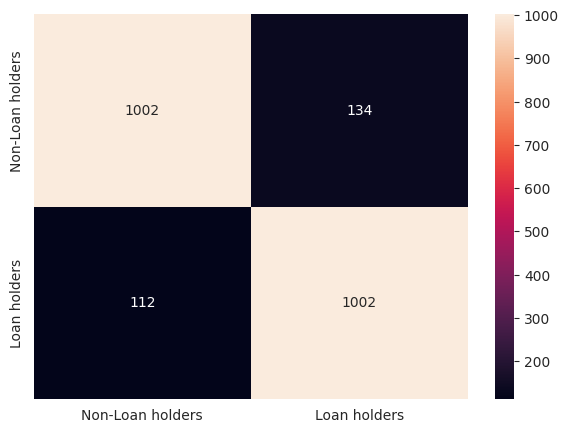

In [19]:
cm = confusion_matrix(y_test, logit_pred, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["Non-Loan holders","Loan holders"]],
                  columns = [i for i in ["Non-Loan holders","Loan holders"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.show()

In [20]:
print("classification  Matrix:\n",classification_report(y_test,logit_pred))

classification  Matrix:
               precision    recall  f1-score   support

         0.0       0.90      0.88      0.89      1136
         1.0       0.88      0.90      0.89      1114

    accuracy                           0.89      2250
   macro avg       0.89      0.89      0.89      2250
weighted avg       0.89      0.89      0.89      2250



In [23]:
smote_nc=SMOTENC(categorical_features=[1,3,5],random_state=42)
x_train_res, y_train_res = smote_nc.fit_resample(X_train, y_train)

In [24]:
g_model = GaussianNB()
g_model.fit(x_train_res, y_train_res.ravel())
g_pred = g_model.predict(X_test)

print('Accuracy on Training data:',g_model.score(X_train, y_train) )
print('Accuracy on Test data:',g_model.score(X_test, y_test) )


Accuracy on Training data: 0.8951111111111111
Accuracy on Test data: 0.892


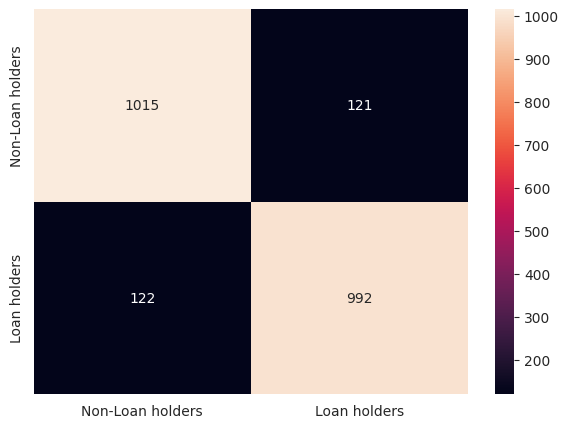

In [25]:
cm = confusion_matrix(y_test, g_pred, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["Non-Loan holders","Loan holders"]],
                  columns = [i for i in ["Non-Loan holders","Loan holders"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.show()

In [26]:
print("classification  Matrix:\n",classification_report(y_test,g_pred))


classification  Matrix:
               precision    recall  f1-score   support

         0.0       0.89      0.89      0.89      1136
         1.0       0.89      0.89      0.89      1114

    accuracy                           0.89      2250
   macro avg       0.89      0.89      0.89      2250
weighted avg       0.89      0.89      0.89      2250



In [ ]:
#Recall value is good for both the classes
# Recall value for class 1 is less in naive bayes model compared to logistic regression.

In [27]:
LR_model=LogisticRegression()
KNN_model=KNeighborsClassifier(n_neighbors=13)
GN_model=GaussianNB()

LR: 0.948193 (0.007921)
KNN: 0.910241 (0.010741)
NB: 0.883133 (0.012662)


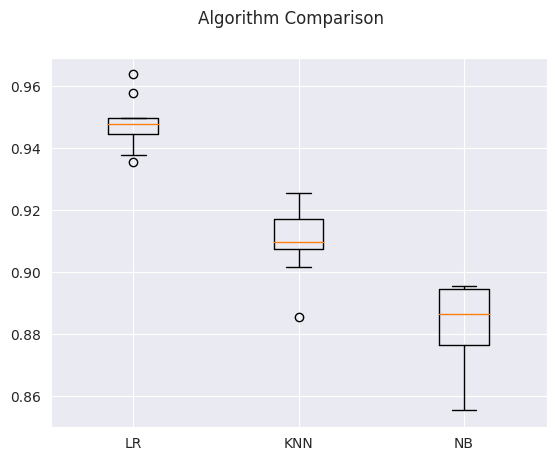

In [28]:
#seed = 7
# prepare models
models = []
models.append(('LR', LR_model))
models.append(('KNN', KNN_model))
models.append(('NB', GN_model))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10)
	cv_results = model_selection.cross_val_score(model,  X,y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
# Without doing any sampling using k-fold we are getiing good accuracy score in logistic regresssion.
# Naive bayes performance is less compared to others.
# As we are having imbalanced data we will use stratified k-fold to check the performance.

LR: 0.950000 (0.008493)
KNN: 0.909237 (0.007116)
NB: 0.882530 (0.012990)


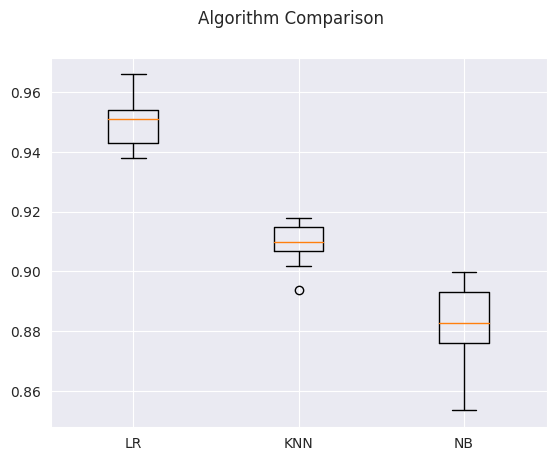

In [29]:
#seed = 7
# prepare models
models = []
models.append(('LR', LR_model))
models.append(('KNN', KNN_model))
models.append(('NB', GN_model))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.StratifiedKFold(n_splits=10)
	cv_results = model_selection.cross_val_score(model,  X,y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
# Very slight improvement in accuracy

In [ ]:
# C. Print evaluation metrics for final model. [1 Marks]
# (printed above)

In [ ]:
# D. Share improvement achieved from base model to final model. [2 Marks]

In [ ]:
# We are selecting final model as logistic regression as it performs well in training and testing test.

# Logistic Regression is not affected by overfitting and it is also has good recall value.

# Logistic regression performed well in k-fold cross validation as well.

# Deviation also less in logistic regression.

# Sampling improved to predict minority classes as well

# Suggesting to collect data equally for both the classes.

# Few customers does't have credit card but those customer having loan on card. This data error can be avoided